In [2]:
import pandas as pd

In [3]:
# Load expression data (proteomic data)
expression_data = pd.read_csv("~/Desktop/2/protein_data.csv")
# Load clinical data for breast cancer
clinical_data = pd.read_csv("~/Desktop/2/clinical_data.csv")
# Load PAM50 proteins list
PAM50_proteins = pd.read_csv("~/Desktop/2/PAM50_proteins.csv")


In [72]:
PAM50_proteins

,GeneSymbol,RefSeqProteinID,Species,Gene Name
0,MIA,NP_006524,Homo sapiens,melanoma inhibitory activity
1,FGFR4,NP_002002,Homo sapiens,fibroblast growth factor receptor 4
2,FGFR4,NP_998812,Homo sapiens,fibroblast growth factor receptor 4
3,FGFR4,NP_075252,Homo sapiens,fibroblast growth factor receptor 4
4,GPR160,NP_055188,Homo sapiens,G protein-coupled receptor 160
...,...,...,...,...
95,FOXC1,NP_001444,Homo sapiens,forkhead box C1
96,GRB7,NP_001025173,Homo sapiens,growth factor receptor-bound protein 7
97,GRB7,NP_005301,Homo sapiens,growth factor receptor-bound protein 7
98,MELK,NP_055606,Homo sapiens,maternal embryonic leucine zipper kinase


In [4]:
clinical_data.set_index(clinical_data.columns[0], inplace=True)
expression_data.set_index(expression_data.columns[0], inplace=True)

In [29]:
# Step 1: Extract the core part of the ID from expression_data (assuming row names are the IDs)
expression_data['core_id'] = expression_data.index.str.split('-').str[-1]  # Extract core ID from expression_data row names

# Set the row names of expression_data to be the core IDs
expression_data.set_index('core_id', inplace=True)
expression_data = expression_data.apply(pd.to_numeric, errors='coerce')
expression_data = expression_data.dropna()


# Step 2: Extract the core part of the ID from clinical_data (row names)
clinical_data['core_id'] = clinical_data.index.str.split('-').str[-1]  # Extract core ID from clinical_data row names

# Set the row names of clinical_data to be the core IDs
clinical_data.set_index('core_id', inplace=True)

In [30]:
expression_data

,NP_958782,NP_958785,NP_958786,NP_000436,NP_958781,NP_958780,NP_958783,NP_958784,NP_112598,NP_001611,...,NP_001652,NP_071753,NP_001294,NP_065775,NP_001094348,XP_003846524,NP_443073,NP_001004456,NP_997625,NP_003270
core_id,,,,,,,,,,,,,,,,,,,,,
A0E1,0.762044,0.762044,0.766384,0.757704,0.766384,0.762044,0.762044,0.762044,-0.583338,2.185546,...,-0.999973,0.228231,2.541421,-0.561638,0.466928,-3.521480,0.566747,1.339257,-1.182250,1.577954
A0TX,-0.583429,-0.572549,-0.567109,-0.583429,-0.572549,-0.577989,-0.577989,-0.577989,0.730304,1.638765,...,0.610626,-0.373993,0.267913,2.462907,-3.866400,-5.884597,-0.689506,2.737621,-1.540848,-2.683224
A0YD,0.063779,0.093336,0.084469,0.066734,0.084469,0.093336,0.084469,0.084469,-0.237711,1.305208,...,0.099248,-1.236767,-0.187463,1.509157,-3.557057,-4.822133,0.563306,1.435262,0.442119,-3.098911
A130,-0.494060,-0.503899,-0.500619,-0.510459,-0.503899,-0.503899,-0.500619,-0.500619,-1.845366,-0.405503,...,1.664094,1.181953,1.201633,-1.182832,2.480781,0.388225,0.371826,-1.445222,0.493181,2.369266
A18N,1.101261,1.101261,1.097767,1.090779,1.108248,1.101261,1.101261,1.101261,-3.444235,2.103995,...,1.338842,2.760838,-0.680602,-6.707488,1.793042,-0.456995,0.385022,1.510041,0.405985,0.636579
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
A1AW,0.578309,0.582213,0.578309,0.590021,0.586117,0.578309,0.582213,0.582213,-1.627551,-1.697826,...,1.222498,1.355240,0.453375,3.377603,0.543171,0.187891,1.417707,0.769613,0.176179,0.390908
A06N,0.238547,0.249818,0.244183,0.249818,0.249818,0.249818,0.244183,0.244183,-1.860681,-0.229200,...,-6.047867,-2.463681,0.841547,-1.869134,-2.582027,-0.136214,-2.939882,-2.759545,-7.197511,0.602038
A0YG,-0.078202,-0.068058,-0.071439,-0.057914,-0.064677,-0.068058,-0.071439,-0.071439,0.351214,-0.287838,...,0.097622,1.213427,-2.681748,-7.760353,4.080709,-2.566786,0.456032,-0.852503,1.210046,-3.672448


In [102]:
clinical_data

,Gender,Age at Initial Pathologic Diagnosis,ER Status,PR Status,HER2 Final Status,Tumor,Tumor--T1 Coded,Node,Node-Coded,Metastasis,...,PAM50 mRNA,SigClust Unsupervised mRNA,SigClust Intrinsic mRNA,miRNA Clusters,methylation Clusters,RPPA Clusters,CN Clusters,Integrated Clusters (with PAM50),Integrated Clusters (no exp),Integrated Clusters (unsup exp)
core_id,,,,,,,,,,,,,,,,,,,,,
A0E1,FEMALE,52,Positive,Positive,Negative,T2,T_Other,N1,Positive,M0,...,Luminal A,-3,-12,6,2,ReacII,2,3,3,3
A0TX,FEMALE,64,Positive,Positive,Positive,T1,T1,N1,Positive,M0,...,HER2-enriched,-5,-11,1,1,ReacII,1,1,2,2
A0YD,FEMALE,63,Positive,Positive,Negative,T3,T_Other,N0,Negative,M0,...,Luminal A,-7,-5,4,1,LumA,2,3,3,3
A130,FEMALE,52,Positive,Positive,Equivocal,T3,T_Other,N2,Positive,M0,...,HER2-enriched,0,-2,4,2,Her2,1,1,1,1
A18N,FEMALE,88,Positive,Positive,Negative,T2,T_Other,N1,Positive,M0,...,Luminal A,-3,-12,6,2,LumA,3,3,3,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
A1AW,FEMALE,65,Positive,Positive,Negative,T2,T_Other,N0,Negative,M0,...,Luminal A,-3,-12,3,1,ReacII,3,3,2,2
A06N,FEMALE,66,Positive,Negative,Negative,T4,T_Other,N0,Negative,M0,...,Luminal B,-3,-10,2,4,LumA/B,3,4,1,3
A0YG,FEMALE,63,Positive,Positive,Positive,T2,T_Other,N3,Positive,M0,...,Luminal B,-5,-2,4,4,Her2,5,4,1,1


In [7]:
#this is to format the data in the same way as the expression and clinical data:
# Load the data 
phosphoproteome_data = pd.read_csv("~/Desktop/2/phospho_data.csv", header=None, low_memory=False)

# Drop the first two rows
phosphoproteome_data = phosphoproteome_data.drop([0, 1])

# Reset the index to ensure proper re-indexing
phosphoproteome_data.reset_index(drop=True, inplace=True)

# Set the third row (which is now the first row after dropping) as column names
phosphoproteome_data.columns = phosphoproteome_data.iloc[0]

# Drop the first row (which is now used as column names)
phosphoproteome_data = phosphoproteome_data.drop([0])

# View the modified dataframe
#print(phosphoproteome_data.head())

In [8]:
# Extract the first 2 columns for phospho_metadata
phospho_metadata = phosphoproteome_data.iloc[:, :2]

# Extract the last 111 columns for phosphoproteome_data
phosphoproteome_data_only = phosphoproteome_data.iloc[:, -111:]

In [73]:
phospho_metadata

,Name,Description
1,NP_055955_S15s _1_0_15_16,NP_055955
2,NP_680780_T31t _1_0_31_32,NP_680780
3,NP_002511_S125s _1_1_125_125,NP_002511
4,NP_001116539_S84s _1_1_84_84,NP_001116539
5,NP_001135452_S299s _1_1_299_299,NP_001135452
...,...,...
33235,NP_006132_S381s_1_1_381_381,NP_006132
33236,XP_003846430_T124t _1_1_124_124,XP_003846430
33237,NP_056093_T286t _1_1_286_286,NP_056093
33238,NP_001191169_S504s _1_1_504_504,NP_001191169


In [10]:
phosphoproteome_data_only_T = phosphoproteome_data_only.T
phosphoproteome_data_only_T

,1,2,3,4,5,6,7,8,9,10,...,33230,33231,33232,33233,33234,33235,33236,33237,33238,33239
0,,,,,,,,,,,,,,,,,,,,,
AO-A12D.01TCGA,1.290593024,0.1619686121,-0.30288627,-1.885554985,-0.1126200857,-0.5753128521,-0.4628828341,1.811662915,1.470048629,0.2635880514,...,NaN,NaN,-0.4823418757,1.537074217,1.04411183,NaN,NaN,NaN,NaN,-0.05640507671
C8-A131.01TCGA,-0.1484804287,-0.1787291921,-1.855014835,-5.227751963,-0.5517972751,-0.03756829589,1.280773646,1.890790376,0.8472080359,-0.04513048676,...,NaN,NaN,-2.228082918,1.079115223,-0.07537925024,NaN,NaN,NaN,NaN,-1.577734503
AO-A12B.01TCGA,2.360191472,0.0159091137,1.036382062,1.022354943,0.9311786657,0.7400591615,-0.7766231421,1.060929522,0.9820269741,-0.4136714232,...,NaN,NaN,-1.093986722,2.051594841,1.273089705,NaN,NaN,NaN,NaN,-0.155923101
E2-A10A.02TCGA,-2.092410459,1.274306741,0.3664279457,-1.952610282,2.527574209,0.3795856094,-6.510096046,0.2397854326,-1.279924725,0.02432868947,...,-8.065989779,-1.931229078,NaN,NaN,NaN,NaN,NaN,NaN,0.706882494,0.2480089724
BH-A18Q.02TCGA,-0.8289945134,0.3948329348,-0.6853717881,-3.7702261,-0.7561717231,-0.2949607178,-2.117553331,-0.3981263374,-0.903840159,-1.361005454,...,-5.564498739,-1.363028309,NaN,NaN,NaN,NaN,NaN,NaN,0.9875295337,-1.128377096
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
BH-A0C7.36TCGA,-2.639905541,0.907178664,-0.692258084,2.085097186,-1.475315659,0.7755583482,0.08413517074,-0.1341213022,-0.7738960013,-0.3590420948,...,NaN,NaN,NaN,-3.059757687,NaN,NaN,NaN,-0.2557451382,NaN,NaN
A2-A0SX.36TCGA,-4.789342009,0.2042573418,-0.9525764958,-2.89998017,-2.801909482,0.2963237026,4.795566725,-0.5202648887,-0.6463557741,-1.402901087,...,NaN,NaN,NaN,-0.4442100689,NaN,NaN,NaN,-0.4982490198,NaN,NaN
263d3f-I.CPTAC,-0.4092853305,-0.7546872251,-0.5380446167,0.254949082,-0.3070954209,-1.302425141,-0.4746868727,-2.213959135,-1.353520095,-1.177753451,...,-1.705053385,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
import pandas as pd

# Assuming phosphoproteome_data_only_T and expression_data are already loaded

# Step 1: Extract the core part of the IDs from expression_data (row names are core IDs)
expression_data['core_id'] = expression_data.index.str.split('-').str[-1]  # Extract core ID from row names (expression_data)

# Step 2: Extract the core part of the IDs from phosphoproteome_data_only_T (row names)
phospho_core_ids = phosphoproteome_data_only_T.index.str.split('.').str[0].str.split('-').str[-1]

# Step 3: Match the core_ids from phosphoproteome_data_only_T with those in expression_data
matching_core_ids = phospho_core_ids.isin(expression_data['core_id'])

# Step 4: Filter phosphoproteome_data_only_T to retain only the rows that match the core IDs from expression_data
phosphoproteome_data_filtered = phosphoproteome_data_only_T[matching_core_ids]

#replacing row names with core ID
phosphoproteome_data_filtered.index = phospho_core_ids[matching_core_ids]

# View the filtered phosphoproteome data
phosphoproteome_data_filtered


,1,2,3,4,5,6,7,8,9,10,...,33230,33231,33232,33233,33234,33235,33236,33237,33238,33239
0,,,,,,,,,,,,,,,,,,,,,
A18Q,-0.8289945134,0.3948329348,-0.6853717881,-3.7702261,-0.7561717231,-0.2949607178,-2.117553331,-0.3981263374,-0.903840159,-1.361005454,...,-5.564498739,-1.363028309,NaN,NaN,NaN,NaN,NaN,NaN,0.9875295337,-1.128377096
A130,2.822363487,-0.8940241312,-0.3616834704,0.1456646711,-1.956206201,0.4980591931,-0.8190465734,-0.4391602802,1.722692638,0.8579514708,...,2.117574443,-0.7740600386,NaN,NaN,NaN,NaN,NaN,NaN,0.2706272676,0.5230517124
A138,-5.295913411,-0.3811784331,-0.2883577725,-4.022604349,-0.5668197543,-0.4025985855,-1.268924751,-0.462099009,-0.9000221257,-0.8286216175,...,0.4565875293,1.506174999,-1.861548969,NaN,NaN,NaN,NaN,NaN,NaN,NaN
A154,0.5379436878,0.6689379798,-0.2435050197,0.9038242965,0.3256425939,-0.598093017,1.493298611,-0.2638317202,-0.6748827744,-1.919328548,...,-4.652140502,-0.3338459107,0.03203469799,NaN,NaN,NaN,NaN,NaN,NaN,NaN
A12L,-0.274196408,0.2991535899,-0.9059631982,-3.041421492,-1.736779799,0.1433754773,0.4614224573,0.2623726467,0.4700767969,-0.3953571623,...,1.207859247,0.5977283058,NaN,1.067226229,0.6734537772,NaN,NaN,-1.994246402,0.234246043,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
A0JL,-4.310151859,-0.006221385777,-0.4752652586,-2.417871857,-1.332830451,0.1850196783,3.597162874,-0.5195526629,-1.012753302,1.461302148,...,NaN,NaN,0.1930719336,1.292204786,NaN,NaN,NaN,-0.7550811313,NaN,NaN
A0BV,-4.927852132,-0.4257343803,-0.8506893951,-0.3655992367,-0.4678289808,0.06536929247,2.879694013,-0.7183920792,-1.053144379,0.7007973099,...,NaN,NaN,0.8350991306,2.869671489,NaN,NaN,NaN,-0.2573559782,NaN,NaN
A0YM,-2.779194368,0.6512863521,-1.074759806,-2.089064059,-2.427645735,0.665694083,4.318053859,-0.07486328376,-1.532925648,-0.8586438431,...,NaN,NaN,NaN,-0.3644586743,NaN,NaN,NaN,1.942219038,NaN,NaN


In [75]:
phosphoproteome_data_filtered_ordered = phosphoproteome_data_filtered.reindex(clinical_data.index)
# Replace column names
phosphoproteome_data_filtered_ordered.columns = phospho_metadata['Name'].values

phosphoproteome_data_filtered_ordered

,NP_055955_S15s _1_0_15_16,NP_680780_T31t _1_0_31_32,NP_002511_S125s _1_1_125_125,NP_001116539_S84s _1_1_84_84,NP_001135452_S299s _1_1_299_299,NP_004454_S48s _1_0_48_50,NP_056425_S413s _1_0_412_415,NP_002826_S673s _1_1_673_673,NP_001348_S87s _1_1_87_87,NP_004517_S40s _1_0_39_41,...,NP_001035375_S7s _1_1_7_7,NP_054828_T1152tS1157s_2_1_1152_1158,NP_955352_S547sS549sS550s_3_0_547_561,NP_891988_Y387yS390s_2_2_387_390,NP_055885_S356s _1_1_356_356,NP_006132_S381s_1_1_381_381,XP_003846430_T124t _1_1_124_124,NP_056093_T286t _1_1_286_286,NP_001191169_S504s _1_1_504_504,NP_036441_S1763sS1774s_2_2_1763_1774
core_id,,,,,,,,,,,,,,,,,,,,,
A0E1,-0.7975038236,0.6083768984,-0.4609134026,-1.049946639,-1.98377982,-0.405499126,0.3128340896,0.7335721159,-1.567146555,-0.2351515348,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
A0TX,-0.3367290526,0.3681990064,-0.7134674643,NaN,-2.045645559,NaN,-0.2318637215,-0.3716841629,-0.8086230425,-2.41850007,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.1720619983,NaN
A0YD,-0.8745693275,0.7487467224,-1.15193448,-0.2964819572,-0.5212937123,0.1239452212,-2.176725727,-1.149014847,-0.5212937123,-2.077458199,...,NaN,NaN,NaN,NaN,-4.746002928,-5.008769915,NaN,NaN,NaN,-0.7431858342
A130,2.822363487,-0.8940241312,-0.3616834704,0.1456646711,-1.956206201,0.4980591931,-0.8190465734,-0.4391602802,1.722692638,0.8579514708,...,2.117574443,-0.7740600386,NaN,NaN,NaN,NaN,NaN,NaN,0.2706272676,0.5230517124
A18N,-1.917991332,-0.2188813123,0.3879436947,1.867341212,-1.445086327,-0.3841888143,-0.7482838185,-0.4344088148,-1.183523824,-1.924268832,...,NaN,NaN,0.4862911958,NaN,NaN,-0.1330888113,0.1284736917,NaN,1.247961205,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
A1AW,1.327279723,0.4488972646,-0.1929976089,0.1544943527,-1.061727513,0.8012155035,-0.1326691433,-0.4005275304,1.17525199,-0.1881713316,...,NaN,NaN,NaN,NaN,NaN,NaN,-0.1833450544,NaN,NaN,NaN
A06N,-1.490900505,0.6952684252,-0.08292748766,0.3382610219,-0.8831856558,0.07953093744,0.4325270216,-0.05284259412,0.3442780006,-1.28231191,...,NaN,0.7754948079,0.2600402987,NaN,NaN,NaN,NaN,0.4686288939,NaN,NaN
A0YG,-9.519018904,-0.3798179118,-0.01641299658,-1.20180522,0.08741697919,-0.1440373418,0.3275237982,-0.04453361502,-0.3625129158,-0.524747253,...,NaN,NaN,-0.5982934858,NaN,NaN,1.456674785,-0.2197466991,NaN,1.181957974,NaN


Now, we have phospho data for all the samples that are present in the expression dataset as well as the clinical dataset. They're named in the same way and also ordered in the same way. 

In [31]:
#loading the necessary libraries to implement ML models like sci-kit
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

common_samples = expression_data.index.intersection(clinical_data.index)
X = expression_data.loc[common_samples]
y = clinical_data.loc[common_samples, 'PAM50 mRNA']

In [32]:
#encodeing the labels (since they have to be numbered
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

#rain-Test Split (e.g. 80% train, 20% test) ---
X_train, X_test, y_train, y_test = train_test_split(
    X, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded
)

In [33]:
y_encoded

array([2, 1, 2, 1, 2, 3, 1, 3, 3, 3, 3, 0, 0, 3, 3, 2, 0, 3, 2, 2, 0, 3,
       0, 1, 2, 3, 1, 2, 0, 3, 2, 0, 0, 3, 0, 2, 2, 1, 1, 2, 0, 0, 3, 0,
       0, 2, 2, 0, 1, 0, 2, 2, 2, 0, 3, 3, 2, 3, 2, 1, 3, 2, 0, 3, 2, 1,
       1, 3, 3, 2, 3, 3, 2, 3])

In [39]:
# --- Step 3: Set up Random Forest with Grid Search and 2-fold CV ---
param_grid = {
    'n_estimators': [300, 500],
    'max_depth': [None, 10, 20],
    'min_samples_split': [3, 5],
    'min_samples_leaf': [1, 2]
}

rf = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    cv=3,  # 3-fold CV on training set
    n_jobs=-1,
    scoring='accuracy',
    verbose=1
)

grid_search.fit(X_train, y_train)

# --- Step 4: Evaluate on Test Set ---
print("Best Parameters:", grid_search.best_params_)
print("Best Training CV Accuracy:", grid_search.best_score_)
best_rfc_model = grid_search.best_estimator_

Fitting 3 folds for each of 24 candidates, totalling 72 fits
Best Parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 3, 'n_estimators': 500}
Best Training CV Accuracy: 0.6929824561403509


The testing accuracy on the training data about 69%. I'm going to now test the model with its best parameters on the testing data.

In [40]:
y_test_pred = grid_search.predict(X_test)
print("\nClassification Report on Test Set:")
print(classification_report(y_test, y_test_pred, target_names=label_encoder.classes_))


Classification Report on Test Set:
               precision    recall  f1-score   support

   Basal-like       1.00      1.00      1.00         3
HER2-enriched       0.00      0.00      0.00         2
    Luminal A       0.60      0.60      0.60         5
    Luminal B       0.57      0.80      0.67         5

     accuracy                           0.67        15
    macro avg       0.54      0.60      0.57        15
 weighted avg       0.59      0.67      0.62        15



/Users/rahishah/miniconda3/envs/my_env/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/rahishah/miniconda3/envs/my_env/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/rahishah/miniconda3/envs/my_env/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metr

HER2-enriched had the worst performance, with 0/2 cases being predicted accurately based on the protein expression data. Our sample sizes in the testing dataset are really small to make any hard conclusions, but it would be interesting to see why HER2-enriched cancer has the worst performance.

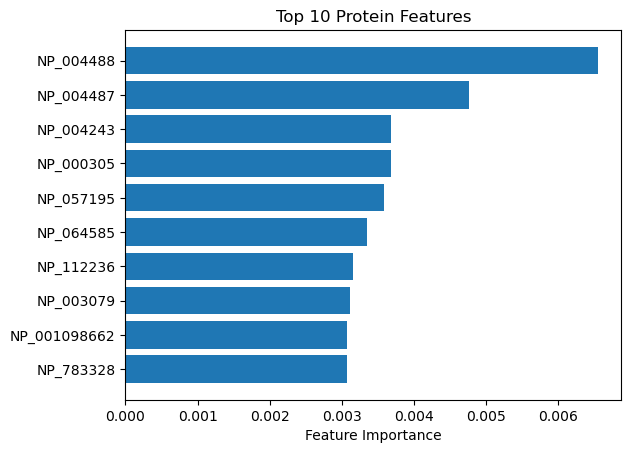

In [41]:
#here, I'll extract the important features/proteins that are key in making the classifications. 
import matplotlib.pyplot as plt
import numpy as np

importances = grid_search.best_estimator_.feature_importances_
top_idx = np.argsort(importances)[-10:]
plt.barh(range(10), importances[top_idx])
plt.yticks(range(10), X.columns[top_idx])
plt.xlabel("Feature Importance")
plt.title("Top 10 Protein Features")
plt.show()

004488 = Hepatocyte nuclear factor 3-gamma

004487 = Hepatocyte nuclear factor 3-alpha

004243 = Na(+)/H(+) exchange regulatory cofactor NHE-RF1

000305 = Phosphatidylinositol 3,4,5-trisphosphate 3-phosphatase and dual-specificity protein phosphatase PTEN

057195 = Telomere length regulation protein TEL2 homolog

064585 = Phosphoribosyltransferase domain-containing protein 1

112236 = Sharpin (involved in the NF-Kappa beta activation) --- CYLD is also in this pathway ***

003079 = Fascin

001098662 = Transducin-like enhancer protein 3

783328 = DNA (cytosine-5)-methyltransferase 3A

In [47]:
#now, I will implement XGB:
from xgboost import XGBClassifier

xgb = XGBClassifier(objective='multi:softprob', num_class=4, eval_metric='mlogloss', random_state=42)
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 3, 6],
    'learning_rate': [0.01, 0.1, 0.2]
}

grid = GridSearchCV(xgb, param_grid, cv=3, n_jobs=-1, scoring='accuracy')
grid.fit(X_train, y_train)

print("Best params:", grid.best_params_)
print("Train accuracy:", grid.best_score_)
best_xgb_model = grid.best_estimator_

Best params: {'learning_rate': 0.1, 'max_depth': None, 'n_estimators': 100}
Train accuracy: 0.5912280701754385


In [48]:
y_pred = best_xgb_model.predict(X_test)
print("Test set performance:")
print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))

Test set performance:
               precision    recall  f1-score   support

   Basal-like       1.00      1.00      1.00         3
HER2-enriched       0.50      0.50      0.50         2
    Luminal A       0.75      0.60      0.67         5
    Luminal B       0.50      0.60      0.55         5

     accuracy                           0.67        15
    macro avg       0.69      0.68      0.68        15
 weighted avg       0.68      0.67      0.67        15



next up is SVM:

In [51]:
from sklearn.svm import SVC

svm = SVC(kernel='rbf', probability=True)
param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': ['scale', 'auto']
}

grid = GridSearchCV(svm, param_grid, cv=3, n_jobs=-1, scoring='accuracy')
grid.fit(X_train, y_train)

print("Best params:", grid.best_params_)
print("Train accuracy:", grid.best_score_)
best_svm_model = grid.best_estimator_

Best params: {'C': 10, 'gamma': 'scale'}
Train accuracy: 0.6929824561403509


In [52]:
y_pred = best_svm_model.predict(X_test)
print("Test set performance:")
print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))

Test set performance:
               precision    recall  f1-score   support

   Basal-like       1.00      1.00      1.00         3
HER2-enriched       0.00      0.00      0.00         2
    Luminal A       0.43      0.60      0.50         5
    Luminal B       0.40      0.40      0.40         5

     accuracy                           0.53        15
    macro avg       0.46      0.50      0.47        15
 weighted avg       0.48      0.53      0.50        15



/Users/rahishah/miniconda3/envs/my_env/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/rahishah/miniconda3/envs/my_env/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/rahishah/miniconda3/envs/my_env/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metr

In [53]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping

y_categorical = to_categorical(y_encoded)  # for softmax

In [54]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y_categorical, test_size=0.2, random_state=42, stratify=y_encoded
) #doing it again since we converted it to categorical.

In [55]:
model = Sequential([
    Dense(256, activation='relu', input_shape=(X.shape[1],)),
    Dropout(0.3),
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dense(y_categorical.shape[1], activation='softmax')  # output layer
])

model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Step 4: Train the model
early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

history = model.fit(
    X_train, y_train,
    validation_split=0.2,
    epochs=100,
    batch_size=16,
    callbacks=[early_stop],
    verbose=1
)


Epoch 1/100


/Users/rahishah/miniconda3/envs/my_env/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 61ms/step - accuracy: 0.3399 - loss: 2.3338 - val_accuracy: 0.1667 - val_loss: 3.4456
Epoch 2/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.7395 - loss: 0.7729 - val_accuracy: 0.2500 - val_loss: 4.5543
Epoch 3/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.8290 - loss: 0.6577 - val_accuracy: 0.4167 - val_loss: 5.4275
Epoch 4/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.8708 - loss: 0.5830 - val_accuracy: 0.4167 - val_loss: 7.3373
Epoch 5/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.8240 - loss: 0.5451 - val_accuracy: 0.5000 - val_loss: 8.2093
Epoch 6/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.8793 - loss: 0.5310 - val_accuracy: 0.4167 - val_loss: 8.2160
Epoch 7/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.9894 - loss: 0.0942 - val_accuracy: 0.4167 - val_loss: 8.3217
Epoch 8/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.8949 - loss: 0.8567 - val_accuracy: 0.4167 - val_loss: 8.6043
Epoc

In [56]:
# Step 5: Evaluate on test set
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"\nTest Accuracy: {accuracy:.2f}")

# Optional: classification report
y_test_pred = model.predict(X_test)
y_test_pred_labels = np.argmax(y_test_pred, axis=1)
y_true_labels = np.argmax(y_test, axis=1)

print("\nClassification Report:")
print(classification_report(y_true_labels, y_test_pred_labels, target_names=label_encoder.classes_))


Test Accuracy: 0.47
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step

Classification Report:
               precision    recall  f1-score   support

   Basal-like       1.00      0.67      0.80         3
HER2-enriched       0.00      0.00      0.00         2
    Luminal A       0.38      0.60      0.46         5
    Luminal B       0.40      0.40      0.40         5

     accuracy                           0.47        15
    macro avg       0.44      0.42      0.42        15
 weighted avg       0.46      0.47      0.45        15



/Users/rahishah/miniconda3/envs/my_env/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/rahishah/miniconda3/envs/my_env/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/rahishah/miniconda3/envs/my_env/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metr

as we can see from the code block above, the training data accuracy is really high (95% after 10 epochs), but the testing accuracy is much lower at 47%. This could mean that the model is 'memorizing' the training data, but is failing to accurately predict the tumor subtypes in the testing dataset. To fix this, I'm going to change the code a little bit. 

In [58]:
from sklearn.preprocessing import StandardScaler


# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 2: Train-test split (with stratification)
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y_categorical, test_size=0.2, random_state=42, stratify=y_encoded
)

In [60]:
from tensorflow.keras.regularizers import l2 #adding L2 regularization

model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],), kernel_regularizer=l2(0.001)),
    Dropout(0.4),
    Dense(64, activation='relu', kernel_regularizer=l2(0.001)),
    Dropout(0.4),
    Dense(y_categorical.shape[1], activation='softmax')
])

model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Step 4: Train the model with early stopping
early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

history = model.fit(
    X_train, y_train,
    validation_split=0.2,
    epochs=100,
    batch_size=16,
    callbacks=[early_stop],
    verbose=1
)

Epoch 1/100


/Users/rahishah/miniconda3/envs/my_env/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - accuracy: 0.2455 - loss: 2.7811 - val_accuracy: 0.5000 - val_loss: 2.1405
Epoch 2/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.6792 - loss: 2.0168 - val_accuracy: 0.4167 - val_loss: 4.0894
Epoch 3/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.7601 - loss: 1.2836 - val_accuracy: 0.5000 - val_loss: 5.5122
Epoch 4/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.7033 - loss: 1.7818 - val_accuracy: 0.5000 - val_loss: 6.5058
Epoch 5/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.8843 - loss: 0.9391 - val_accuracy: 0.4167 - val_loss: 7.2780
Epoch 6/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.8943 - loss: 0.7866 - val_accuracy: 0.4167 - val_loss: 7.9626
Epoch 7/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.8162 - loss: 1.2570 - val_accuracy: 0.4167 - val_loss: 8.3840
Epoch 8/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.9262 - loss: 1.1292 - val_accuracy: 0.4167 - val_loss: 8.7518
Epoc

In [61]:
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"\nTest Accuracy: {accuracy:.2f}")

# Predict and classify
y_test_pred = model.predict(X_test)
y_test_pred_labels = np.argmax(y_test_pred, axis=1)
y_true_labels = np.argmax(y_test, axis=1)

print("\nClassification Report:")
print(classification_report(y_true_labels, y_test_pred_labels, target_names=label_encoder.classes_))


Test Accuracy: 0.53
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step

Classification Report:
               precision    recall  f1-score   support

   Basal-like       0.60      1.00      0.75         3
HER2-enriched       0.00      0.00      0.00         2
    Luminal A       0.50      0.80      0.62         5
    Luminal B       0.50      0.20      0.29         5

     accuracy                           0.53        15
    macro avg       0.40      0.50      0.41        15
 weighted avg       0.45      0.53      0.45        15



/Users/rahishah/miniconda3/envs/my_env/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/rahishah/miniconda3/envs/my_env/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/rahishah/miniconda3/envs/my_env/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metr

**bit better but still sucks**

**using the phosphoproteomics data with the same 4 models below**

In [76]:
# Step 1: Align X and y
X = phosphoproteome_data_filtered_ordered.values.astype(np.float32)
y = clinical_data["PAM50 mRNA"].values

# Encode labels
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Step 2: Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [77]:
# Step 3: Train-test split (stratified) with the phospho data
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y_encoded, test_size=0.2, stratify=y_encoded, random_state=42
)

In [78]:
# Step 4: Define RFC and hyperparameter grid
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

rfc = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(
    estimator=rfc,
    param_grid=param_grid,
    cv=5,
    n_jobs=-1,
    scoring='accuracy',
    verbose=1
)

# Step 5: Fit and evaluate
grid_search.fit(X_train, y_train)

print("Best Parameters:", grid_search.best_params_)
print("Best Cross-Validation Accuracy:", grid_search.best_score_)
best_rfc_phospho_model = grid_search.best_estimator_

Fitting 5 folds for each of 24 candidates, totalling 120 fits
Best Parameters: {'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 200}
Best Cross-Validation Accuracy: 0.6212121212121213


In [79]:
y_test_pred = best_rfc_phospho_model.predict(X_test)

print("\nClassification Report on Test Set:")
print(classification_report(y_test, y_test_pred, target_names=label_encoder.classes_))


Classification Report on Test Set:
               precision    recall  f1-score   support

   Basal-like       0.75      1.00      0.86         3
HER2-enriched       0.00      0.00      0.00         2
    Luminal A       0.75      0.60      0.67         5
    Luminal B       0.57      0.80      0.67         5

     accuracy                           0.67        15
    macro avg       0.52      0.60      0.55        15
 weighted avg       0.59      0.67      0.62        15



/Users/rahishah/miniconda3/envs/my_env/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/rahishah/miniconda3/envs/my_env/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/rahishah/miniconda3/envs/my_env/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metr

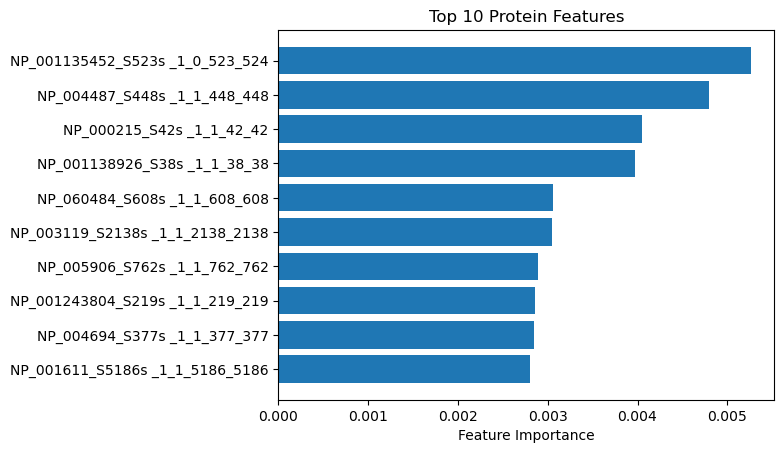

In [81]:
#here, I'll extract the important features/proteins that are key in making the classifications. 
import matplotlib.pyplot as plt
import numpy as np

importances = best_rfc_phospho_model.feature_importances_
top_idx = np.argsort(importances)[-10:]
plt.barh(range(10), importances[top_idx])
plt.yticks(range(10), phosphoproteome_data_filtered_ordered.columns[top_idx])
plt.xlabel("Feature Importance")
plt.title("Top 10 Protein Features")
plt.show()

In [70]:
#now, I will implement XGB:
from xgboost import XGBClassifier

xgb = XGBClassifier(objective='multi:softprob', num_class=4, eval_metric='mlogloss', random_state=42)
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 3, 6],
    'learning_rate': [0.01, 0.1, 0.2]
}

grid = GridSearchCV(xgb, param_grid, cv=3, n_jobs=-1, scoring='accuracy')
grid.fit(X_train, y_train)

print("Best params:", grid.best_params_)
print("Train accuracy:", grid.best_score_)
best_xgb_phospho_model = grid.best_estimator_

/Users/rahishah/miniconda3/envs/my_env/lib/python3.11/site-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


Best params: {'learning_rate': 0.1, 'max_depth': None, 'n_estimators': 100}
Train accuracy: 0.5236842105263158


In [71]:
y_pred = best_xgb_phospho_model.predict(X_test)
print("Test set performance:")
print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))

Test set performance:
               precision    recall  f1-score   support

   Basal-like       1.00      0.67      0.80         3
HER2-enriched       0.00      0.00      0.00         2
    Luminal A       0.40      0.40      0.40         5
    Luminal B       0.38      0.60      0.46         5

     accuracy                           0.47        15
    macro avg       0.44      0.42      0.42        15
 weighted avg       0.46      0.47      0.45        15



/Users/rahishah/miniconda3/envs/my_env/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/rahishah/miniconda3/envs/my_env/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/rahishah/miniconda3/envs/my_env/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metr

In [82]:
from sklearn.svm import SVC

svm = SVC(kernel='rbf', probability=True)
param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': ['scale', 'auto']
}

grid = GridSearchCV(svm, param_grid, cv=3, n_jobs=-1, scoring='accuracy')
grid.fit(X_train, y_train)

print("Best params:", grid.best_params_)
print("Train accuracy:", grid.best_score_)
best_svm_phospho_model = grid.best_estimator_

ValueError: 
All the 24 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
24 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/rahishah/miniconda3/envs/my_env/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/rahishah/miniconda3/envs/my_env/lib/python3.11/site-packages/sklearn/base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/rahishah/miniconda3/envs/my_env/lib/python3.11/site-packages/sklearn/svm/_base.py", line 190, in fit
    X, y = self._validate_data(
           ^^^^^^^^^^^^^^^^^^^^
  File "/Users/rahishah/miniconda3/envs/my_env/lib/python3.11/site-packages/sklearn/base.py", line 650, in _validate_data
    X, y = check_X_y(X, y, **check_params)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/rahishah/miniconda3/envs/my_env/lib/python3.11/site-packages/sklearn/utils/validation.py", line 1301, in check_X_y
    X = check_array(
        ^^^^^^^^^^^^
  File "/Users/rahishah/miniconda3/envs/my_env/lib/python3.11/site-packages/sklearn/utils/validation.py", line 1064, in check_array
    _assert_all_finite(
  File "/Users/rahishah/miniconda3/envs/my_env/lib/python3.11/site-packages/sklearn/utils/validation.py", line 123, in _assert_all_finite
    _assert_all_finite_element_wise(
  File "/Users/rahishah/miniconda3/envs/my_env/lib/python3.11/site-packages/sklearn/utils/validation.py", line 172, in _assert_all_finite_element_wise
    raise ValueError(msg_err)
ValueError: Input X contains NaN.
SVC does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values


now, I will only use the PAM50 protein list to subset my protein expression as well as the phosphosite dataset to see if the models perform more accurately with that subset of the data. 

In [83]:
# Step 1: Get the list of RefSeq protein IDs
pam50_protein_ids = PAM50_proteins['RefSeqProteinID'].dropna().unique()

# Step 2: Filter expression_data columns
# (This assumes the column names in expression_data are RefSeqProteinIDs)
expression_data_PAM50 = expression_data.loc[:, expression_data.columns.isin(pam50_protein_ids)]

In [84]:
expression_data_PAM50

,NP_057427,NP_002408,NP_000415,NP_000413,NP_000517,NP_004439,NP_005219,NP_058519,NP_058518,NP_001116539,...,NP_006614,NP_001153651,NP_001159403,NP_000116,NP_004314,NP_005931,NP_003003,NP_004487,NP_008950,NP_054895
core_id,,,,,,,,,,,,,,,,,,,,,
A0E1,1.078860,-0.956573,-1.295089,-2.024200,-0.492199,-2.566693,-0.778636,-4.697605,-4.741004,-4.810443,...,0.853183,4.303439,1.235098,-2.831429,4.017002,-1.425287,5.779019,-0.249163,-0.053865,0.614486
A0TX,-1.388532,-2.653305,-4.445747,-3.118415,-2.857301,1.663244,-0.014961,-3.428489,-3.689603,-3.733122,...,3.529125,-1.233495,-1.535409,-3.629765,-0.047600,1.067577,2.250752,-0.888062,-1.940680,-2.851861
A0YD,-1.632842,-2.897917,-0.831824,-0.740195,0.119938,-4.431969,-3.698935,-2.336318,-2.776730,-2.584604,...,-1.822012,3.164396,-1.156960,-0.817045,0.114027,0.708139,1.999817,-0.556936,-0.630831,0.004663
A130,0.106156,1.883845,-2.639094,-1.976560,-1.579696,-2.960521,-2.422622,1.152435,1.149155,1.158994,...,-0.389104,-1.245150,0.040559,-1.953601,-1.681372,1.286909,-0.749889,1.113076,0.847407,1.923204
A18N,-0.649157,-3.465198,-3.507124,-6.389548,-3.884459,-1.606471,-1.092876,3.505027,3.539966,3.742609,...,-1.477199,-3.196172,-3.779644,3.417681,0.640073,-0.883245,-2.846787,2.306638,-2.983047,-4.104572
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
A1AW,-2.306877,-1.650976,-5.469260,-7.948412,-6.304754,-2.529415,-3.849027,3.584524,3.803158,3.611853,...,-3.638201,-1.323025,-1.576797,-0.534382,-2.455236,-4.063757,-4.809454,-0.428969,-1.857897,0.691530
A06N,-0.358817,0.269542,-3.695040,-3.438625,-3.427354,-1.209779,-3.385087,-2.331246,-2.243896,-2.331246,...,-4.233232,-1.401387,-0.936457,4.234125,-1.477466,-1.632443,-3.616143,1.785495,-2.038200,-1.945214
A0YG,0.090860,1.294577,-2.806853,-5.051989,-3.202457,5.767942,-0.247263,-3.303894,-3.303894,-3.527055,...,-0.095108,2.961523,2.183840,0.533801,-1.001277,-1.180482,1.152565,0.932786,0.834730,2.643687


In [85]:
PAM50_protein.unique()

NameError: name 'PAM50_protein' is not defined